#EOSC 511
##Assignment 3, Lab3
Tereza Jarníková
Student number: 81586142

####Problems:
  #### 2: Condition number for Dirichlet problem
  #### 3: Condition number for Neumann problem
  #### 5: Smoke in a hallway
  
####Problem 2: Condition number for the Dirichlet problem

a) Using Python, compute the condition number for the matrix A1 from
Equation Differential System Matrix for several values of N between 5
and 50. ( Hint: This will be much easier if you write a small Python
function that outputs the matrix A for a given value of N.)

b) Can you conjecture how the condition number of A1 depends on N?

c) Another way to write the system of equations is to substitute the
boundary conditions into the equations, and thereby reduce size of the
problem to one of N − 1 equations in N − 1 unknowns. The
corresponding matrix is simply the N − 1 by N − 1 submatrix of A1 from
Equation Differential System Matrix. Does this change in the matrix make a significant difference in the
condition number?

####Problem 2 solution: 

a) I wrote a function matrix_condno that creates the matrix A for a given N >=2, then calculates condition number using numpy's linalg.cond function. In the block below, the matrices for various values of N are viewable, as well as the corresponding condition numbers.

For Ns of 5, 10, 15, 20 , and 25, I get the following output:

   For an N of 5 the condition number is 10.9946003198
   For an N of 10 the condition number is 40.6897549839
   For an N of 15 the condition number is 91.0863987713
   For an N of 20 the condition number is 161.873774375
   For an N of 25 the condition number is 252.978910387

In [51]:
import numpy as np
def matrix_condno(N):
    if (N<2):
        print("this algorithm only builds matrices for N >= 2")
        matrix = "error"
    else:
        matrix = np.zeros((N+1, N+1))
        matrix[0,0] = 1
        
        for i in range(1,N):
            
            matrix[i][i] = -2
            matrix[i][i-1] =1
            matrix[i][i+1]=1
            matrix[N][N] =1

        print(matrix)
        condno = np.linalg.cond(matrix)
        print("The condition number of the differential system matrix of " + str(N+1) + " equations is ")
        print(condno)
    return condno

c5 = matrix_condno(5)
c10 = matrix_condno(10)
c15 = matrix_condno(15)
c20 = matrix_condno(20)
c25 = matrix_condno(25)

print("RESULTS")
print("For an N of 5 the condition number is " + str(c5))
print("For an N of 10 the condition number is " + str(c10))
print("For an N of 15 the condition number is " + str(c15))
print("For an N of 20 the condition number is " + str(c20))
print("For an N of 25 the condition number is " + str(c25))


[[ 1.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  1.]]
The condition number of the differential system matrix of 6 equations is 
10.9946003198
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
The condition number of the differential system matrix of 11 equations is 
40.6897549839
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1

b) To find some sort of relationship between N and condition number, I modified the code above as follows, and put it in a loop to find condition numbers for many Ns, and then put the results in an array called condar, and used these as the basis of a plot (see below) - from the plot we see that the condition number of a matrix increases nonlinearly with an increase in N - there appears to be an exponential relationship.  

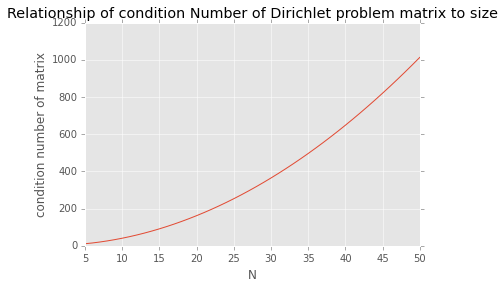

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

def matrix_condno_compact(N):
    if (N<2):
        print("this algorithm only builds matrices for N >= 2")
        matrix = "error"
    else:
        matrix = np.zeros((N+1, N+1))
        matrix[0,0] = 1
        
        for i in range(1,N):
            matrix[i][i] = -2
            matrix[i][i-1] =1
            matrix[i][i+1]=1
            matrix[N][N] =1
        condno = np.linalg.cond(matrix)
    return condno

condar = np.zeros((46,2))

for i in range (5,51):
    condar[i-5][0] = i
    condar[i-5][1] = matrix_condno_compact(i)
    
#print(condar)
N = (condar[:,0])    
cond = (condar[:,1])

plt.xlabel('N')
plt.ylabel('condition number of matrix')
plt.title("Relationship of condition number of Dirichlet problem matrix to size")
plt.plot(N,cond)


c) To investigate whether rewriting the problem to a smaller matrix size would change the condition number, I modified the matrix_condno code to output the matrix as well as the condno for a given N. I then made a simple submatrix function which would take the specified submatrix. Then, for all N between 5 and 50, I created the corresponding matrix, I calculated the condition number, took a submatrix, and calculated its condition number. I stored N, condition number from the original matrix, and condition number from the submatrix in an array. I then plotted the original and submatrix condition numbers against each other - as the plot shows visually, they are almost same. Printing out the values of the condition numbers of the 2 matrices for various Ns shows us this more obviously (first column is N, 2nd column is the condition number of the N+1 matrix, 3rd column is the condition number of the N-1 submatrix). We see that the two condition numbers are close in value, and furthermore that they converge to the same value as N gets large. (The code for all this is below.) 

     [  N    cond no. N+1 matrix   cond no N-1 matrix]
    [[  5.          10.99460032   9.47213595]
     [  6.          15.23311899  13.92820323]
     [  7.          20.33652615  19.19566936]
     [  8.          26.28708642  25.27414237]
     [  9.          33.07381141  32.16343748]]

[[    5.            10.99460032     9.47213595]
 [    6.            15.23311899    13.92820323]
 [    7.            20.33652615    19.19566936]
 [    8.            26.28708642    25.27414237]
 [    9.            33.07381141    32.16343748]
 [   10.            40.68975498    39.86345819]
 [   11.            49.13030204    48.37415008]
 [   12.            58.39225245    57.69548054]
 [   13.            68.47331059    67.82742907]
 [   14.            79.37178441    78.76998224]
 [   15.            91.08639877    90.52313097]
 [   16.           103.6161745    103.08686892]
 [   17.           116.9603475    116.46119158]
 [   18.           131.11831298   130.64609564]
 [   19.           146.08958623   145.64157867]
 [   20.           161.87377438   161.4476388 ]
 [   21.           178.47055573   178.06427461]
 [   22.           195.87966446   195.491485  ]
 [   23.           214.10087905   213.7292691 ]
 [   24.           233.13401347   232.77762622]
 [   25.           252.97891039   252.63

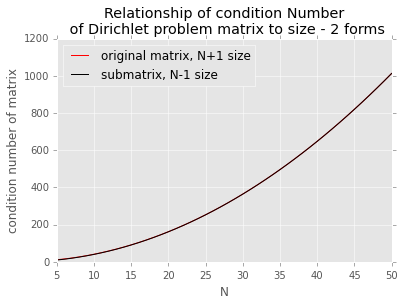

In [28]:
def matrix_condno_ext(N):
    if (N<2):
        print("this algorithm only builds matrices for N >= 2")
        matrix = "error"
    else:
        matrix = np.zeros((N+1, N+1))
        matrix[0,0] = 1
        
        for i in range(1,N):
            matrix[i][i] = -2
            matrix[i][i-1] =1
            matrix[i][i+1]=1
            matrix[N][N] =1
        condno = np.linalg.cond(matrix)
    return condno, matrix


def submatrix(mat):
    size = mat.shape
    rows = size[0]
    cols = size[1]

    if (rows != cols):
        print("no this is not a square matrix")
    else:
        submat = mat[1:(rows-1), 1:(cols-1)]

    return submat


condar = np.zeros((46,3))

for i in range (5,51):
    condar[i-5][0] = i
    condno, matrix = matrix_condno_ext(i)
    condar[i-5][1] = condno
    submat = submatrix(matrix)
    condnosub = np.linalg.cond(submat)
    condar[i-5][2] = condnosub
    
N = (condar[:,0])    
cond = (condar[:,1])
condnosub = (condar[:,2])
    
plt.plot(N,cond, 'r', label = "original matrix, N+1 size ")
plt.plot(N,condnosub, 'k', label = "submatrix, N-1 size")
plt.legend( loc='upper left' )

plt.xlabel('N')
plt.ylabel('condition number of matrix')
plt.title("Relationship of condition number \n of Dirichlet problem matrix to size - 2 forms")

print(condar[0:5,:])
    



####Problem 3: Condition number for the Neumann problem
> How can we make the discrete Neumann problem
solvable? Think in terms of discretizing the *solvability conditions*
$u(\frac{1}{2}) = c$ (condition c) above), or $\int_0^1 u(x) dx = c$
(condition b) above), (the integral condition can be thought of as an
*average* over the domain, in which case we can approximate it by the
discrete average $\frac{1}{N}(u_0+u_1+\dots+u_N)=c$). 

> a) Derive the
matrix corresponding to the linear system to be solved in both of these
cases.

> b\) How does the conditioning of the resulting matrix depend on the the
size of the system?

> c\) Is it better or worse than for Dirichlet boundary conditions?


####Problem 3 solution:

a) I wrote a function that produces the matrix A3 from section 5, which is the ODE discretization coefficient matrix for a Neumann boundary problem for a given N, and then adds a row to the matrix corresponding to the solvability condition(it takes values of 1 or 2). 

*integral solvability condition*

I call the solvability condition b) (integral) 1 in this code (discretized as a row where every coefficient is 1/(N+1) - with (N+1) coefficients that sum to 1)

*known value at midpoint solvability condition*

I call the solvability condition c) (known value at the midpoint) 2. Here, the added row simply has a coefficient of 1 at the index corresponding to the midpoint. For condition 2, if N is odd (matrix has N+1 columns), the coefficient of 1 is placed at int(N/2), the grid point left of the midpoint, for convenience. 


The code below prints out matrices for both solvability conditions for Ns of 5 and 10.



In [57]:
def matrix_neumann(N,solv_cond):

    if (N<2):
        print("this algorithm only builds matrices for N >= 2")
        matrix = "error"

    else:
        matrix = np.zeros((N+2, N+1))
        matrix[0,0] = -2
        matrix[0,1] = 2
        
        for i in range(1,N):
            
            matrix[i][i] = -2
            matrix[i][i-1] = 1
            matrix[i][i+1]=1
            matrix[N][N-1] =2
            matrix[N][N] =-2
            
    if (solv_cond == 1):
        for i in range (0,N+1):
            matrix[N+1][i] =1/(N+1)
    elif (solv_cond ==2):
         matrix[N+1][int(N/2)] =1
    else:
        print("you need to input a solvability condition that's either 1 or 2. -TJŠJ")
        matrix = "error"
        condno = "error"
        return condno
    
    
    #print(matrix)
    condno = np.linalg.cond(matrix)
    #print("Its conditioning number is " + str(condno))
        
#         print(condno)
    return condno, matrix

c,m = matrix_neumann(5,1)
print("Here is the ODE disc. matrix for a \n Neumann boundary problem with N of 5 \n with solvability condition 1")
print(m)
c,m = matrix_neumann(5,2)
print("Here is the ODE disc. matrix for a \n Neumann boundary problem with N of 5 \n with solvability condition 2")
print(m)
c,m = matrix_neumann(10,1)
print("Here is the ODE disc. matrix for a \n Neumann boundary problem with N of 10 \n with solvability condition 1")
print(m)
c,m = matrix_neumann(10,2)
print("Here is the ODE disc. matrix for a \n Neumann boundary problem with N of 10 \n with solvability condition 2")
print(m)



Here is the ODE disc. matrix for a 
 Neumann boundary problem with N of 5 
 with solvability condition 1
[[-2.          2.          0.          0.          0.          0.        ]
 [ 1.         -2.          1.          0.          0.          0.        ]
 [ 0.          1.         -2.          1.          0.          0.        ]
 [ 0.          0.          1.         -2.          1.          0.        ]
 [ 0.          0.          0.          1.         -2.          1.        ]
 [ 0.          0.          0.          0.          2.         -2.        ]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]]
Here is the ODE disc. matrix for a 
 Neumann boundary problem with N of 5 
 with solvability condition 2
[[-2.  2.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  2. -2.]
 [ 0.  0.  1.  0.  0.  0.]]
Here is the ODE disc. matrix for a 
 Neumann boundary problem with N of 10

b)/c) The condition number of the Neumann matrix again increases exponentially with size - the plot of condition number vs. N can be seen below. A comparison of Neumann and Dirichlet condition numbers at N=5 and N=50 shows that the Dirichlet numbers are slightly smaller (the Dirichlet problem is slightly easier to solve), and that the condition numbers for both solvability conditions are very similar and seem to converge for large N. 


     Dirichlet 
     [N         (N+1)x(N+1) matrix  (N-1)x(N-1) matrix]
     [5.            10.99460032     9.47213595]
     [50.          1012.71744515  1012.54523556]]

     Neumann
     [N         integral condition  midpoint condition]
     [    5.            11.17810545    13.84464819]
     [   50.          1031.14673924  1031.15176313]]



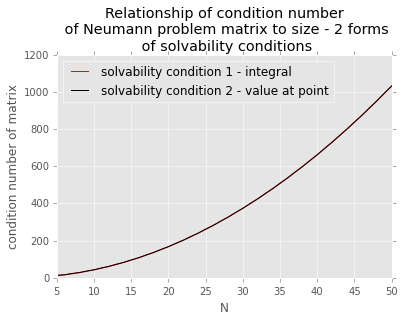

In [64]:
condar = np.zeros((46,3))

for i in range (5,51):
    condar[i-5][0] = i
    condno_1, m = matrix_neumann(i,1)
    condar[i-5][1] = condno_1
    condno_2, m = matrix_neumann(i,2)
    condar[i-5][2] = condno_2
    
#print(condar)

N = (condar[:,0])    
cond_1 = (condar[:,1])
cond_2 = (condar[:,2])
    
plt.plot(N,cond_1, 'r', label = "solvability condition 1 - integral")
plt.plot(N,cond_2, 'k', label = "solvability condition 2 - value at point")
plt.legend( loc='upper left' )

plt.xlabel('N')
plt.ylabel('condition number of matrix')
plt.title("Relationship of condition number \n of Neumann problem matrix to size - 2 forms \n of solvability conditions")


####Problem 5 - Smoke in a hallway. 

I wrote a) and b) on paper and scanned:

<img src=files/lab3_files/IMG_1188.JPG>
<img src=files/lab3_files/IMG_1189.JPG>

c) I wrote a function that creates the matrices in the above notes, (the coefficient matrix A and the solution matrix F, which is 0 at all points except where the single smoker is standing). I chose a discretization with an N of 10 and a smoker at N=4, which is to say, at metre 8 of the hallway. Then my solutions, the array

$$ [ S_{0}  ...  S_{10} ]$$


are as follows (and represent the concentration of smoke at each point N in the discretization mesh)


                [[ 0.1142514 ]
                [ 0.12796157]
                [ 0.17238252]
                [ 0.25817527]
                [ 0.40593008]
                [ 0.25110811]
                [ 0.15655209]
                [ 0.09956857]
                [ 0.06648151]
                [ 0.04935   ]
                [ 0.0440625 ]]
                

d) The condition number of this matrix is 18.1628271741. 
e) If gamma is 0, the condition number of this matrix is 2.30523332293e+16 - very large - python raises the objection "singular matrix". If gamma is 0, there is no exit point of smoke from the system, but there is a source, so steady state is not achievable - the smoker is drowning in smoke as t increases. 
f) If alpha is 0, there is no input of smoke  into the system or loss of smoke from it - we would have to set initial concentrations of smoke at a point to work out the steady-state concentration in the whole hallway. 


In [7]:
import numpy as np

def matrix_hallwaysmoke(N):
    L = 20
    d = L/N
    gamma = .003
    K = .05
    
    R = - 2 - (d*d*gamma/K)
    if (N<2):
        print("This algorithm only builds matrices for N >= 2. -TJŠJ")
        matrix = "error"

    else:
        matrix = np.zeros((N+1, N+1))
        matrix[0,0] = R
        matrix[0,1] = 2
        
        for i in range(1,N):
            
            matrix[i][i] = R
            matrix[i][i-1] = 1
            matrix[i][i+1]=1
            matrix[N][N-1] =2
            matrix[N][N] =R

        print(matrix)
        condno = np.linalg.cond(matrix)
        print(condno)
    return matrix

def F_array(N,xstar):
    matrix = np.zeros((N+1, 1))
    L = 20
    d = L/N
    K = .05
    alpha = .005
    W = alpha  * -1 * d * d / K
    
    matrix[xstar][0] = W
#     print(matrix)
    return matrix
# matrix_hallwaysmoke(5)

A = matrix_hallwaysmoke(10)
F = F_array(10,4)
print(F)
soln_of_system = np.linalg.solve(A,F)
print(soln_of_system)



[[-2.24  2.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.   -2.24  1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.   -2.24  1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.   -2.24  1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.   -2.24  1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.   -2.24  1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.   -2.24  1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.   -2.24  1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.   -2.24  1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.   -2.24  1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    2.   -2.24]]
18.1628271741
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [-0.4]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]
[[ 0.1142514 ]
 [ 0.12796157]
 [ 0.17238252]
 [ 0.25817527]
 [ 0.40593008]
 [ 0.25110811]
 [ 0.15655209]
 [ 0.09956857]
 [ 0.06648151]
 [